# **Project Introduction - NBA Analytics**
### **Team: Kapil M Tare, Shreyas Kashyap, Jovita Andrews, Kunal R Jain**

---

Sports Analytics has been prevailing for decades. The first sport to adopt sports analytics was baseball, in 1964. With baseball emphasizing the value of analytics, various other sports and leagues such as Formula 1, NBA and the NFL have embraced this approach towards their decision making. The group decided to work on data from the National Basktball Association (NBA). With years of player data, team data and data representing games played, **the team will have the opportunity to build supervised models to predict, Most Valuable Players, Championship Teams, and Defensive Player of the Year.**
    
Baseball has proven to be a statistical sport, hence the appreciation of analytics, but this team is going to validate if NBA outcomes can be predicted from analysing previous data collected and how accurate the predictions can be. **Our overall goal would be to provide team GMs with information to decide which players would be key to the success of their team based on the predicted points per game for the respective players using linear regression modeling. The impact score (+/-) does not only consider a players ability to score but also considers their selfless impact on and off the basketball court. This impact score will also be analysed to understand the importance of overall efficiency. Through this, we will be making calculated decisions to produce championship winning lineups.** "The NBA has become a staple in American culture and as technology has progressed, accessing NBA data has become increasingly easier." (Ballard, Feb 2019). In order to achieve our goals, we will be using a python module called 'nba_api'. The nba_api is an API client for NBA.com built into Python as module, giving easy public access to basketball statistics. With reference material from Pypi.com, the team will learn the methods associated with nba_api to achieve our goals.

---

## **Objectives of our project.**

> **1. Grouping Players Based on Physical Attributes:**

> Normally, we would aim to categorize players into distinct groups based on their positions in a sports team. However, in the modern day NBA structure, players take-on more than their intial responsibilities. It is normal for 'big men' to pass the ball and shoot 3-pointers now. Instead of grouping players by their position, the team will include features such as a player's height and weight to predict a players offensive success.


> **2. Building a Linear Regression Model and Predicting PPG for Each Player:**

> We intend to construct a linear regression model that leverages relevant player statistics to predict points per game for each player. This prediction will serve as a quantitative measure of a player's offensive performance and influence on the team's success.

> **3. Understanding Team Potential based on Offensive Stats:**

> By analysing a team's performance with respect to certain features, we aim to understand the key factors that influence a team's offensive success.


> **4. Assembling a Superteam:**

> Lastly, our objective is to identify and assemble a "superteam" by selecting players with the highest impact scores and points-per-game across various positions. This superteam will consist of players who, when combined, are expected to have the greatest offensive influence on the team's performance.

## **Questions to be Answered:**

In the pursuit of our objectives, we aim to answer the following key questions:

> **1. Credibility of Performance Evaluation Report (PER) for each player:**
> How can we enhance the credibility of performance evaluation reports for individual players by quantifying their impact on the team? Is the PER a good measure of a player's efficiency?

> **2. Credibility of impact of each player:**

> How can we determine the credibility of the impact each player has on the team's performance, ensuring that it aligns with objective data analysis?

> **3. How do we define success for each team? How do certain attributes affect a team's success?:**

> What criteria and benchmarks should be used to define success and effectiveness for teams, providing a standardized evaluation framework?

> **4. Based on years' worth of EDA, what is the approximate data timeline for a good impact score?**

> By analyzing historical data, what is the expected timeline for a player to achieve a substantial impact score, and how does this vary with position and experience?

---


# Data Collection and Integration

As mentioned in the introduction, the team will be utilizing python's built in module, nba_api for retrieval, cleaning and analysis of data. This library is an entire package that can be used to access data. There are 4 branches with which data can be accessed: live data, stats, tools, endpoints.

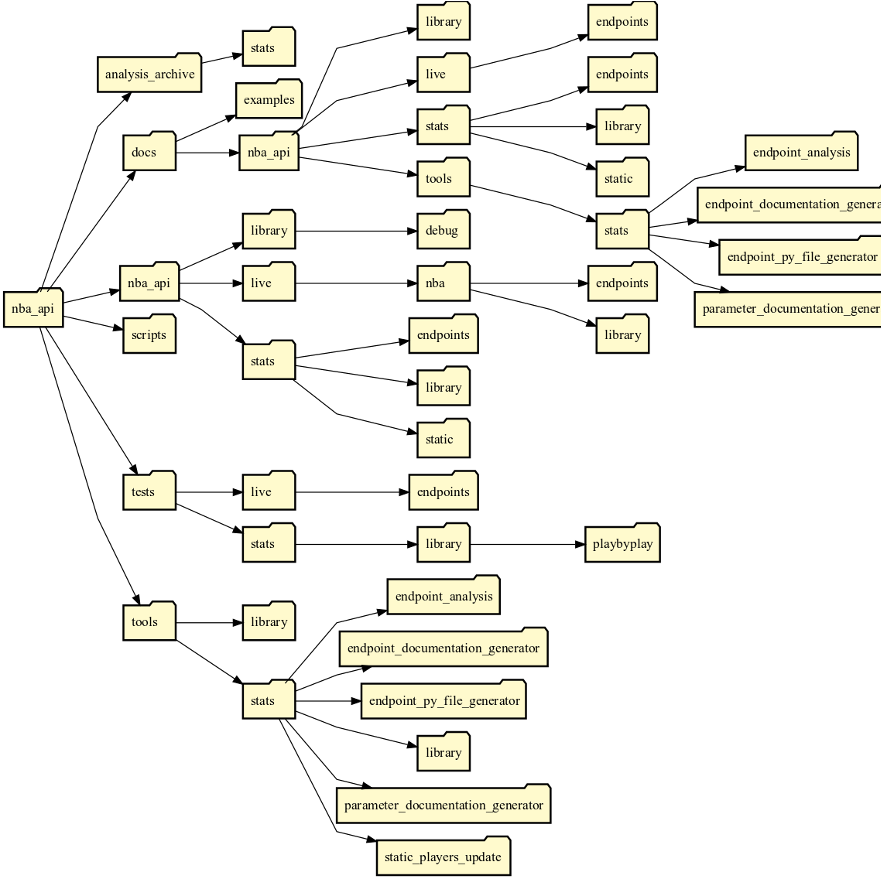

> 1. **Live Data** is the real-time data that is collected during each game every night.

> 2. **Stats** represents the historical and current statistical data. This provides the team access to only overall information of teams and players. It does not include game log and performance statistics. There are 2 static stats links.

> 3. **Tools** are helper functions and utilities that support data retrieval. This will be specific to each stats family and endpoint.

> 4. **Endpoints** are specific URLs defined by NBA API that can be called to retrieve more detailed information for further analysis. The endpoints, unlike stats contain performance statistics. There are 135 endpoints in the module.

The team tapped into each branch and utilized them whenever applicable.

---


In [1]:
# Installing and importing the necessary libraries
!pip install nba_api
!pip install pandas
!pip install requests
import requests
import time
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import leaguestandings
import nba_api as nba
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playercareerstats, playergamelog, leaguedashptstats, leaguedashplayerstats, teamgamelog
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import leaguegamelog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 2.1 MB/s eta 0:00:00


In [2]:
# Dataframe that contains the players information
players_df = pd.DataFrame(players.get_players())
active_plyrs_df = players_df[players_df.is_active == True]
active_plyrs_list = active_plyrs_df.id.to_list()

In [3]:
# Dataframe that contains the teams information
teams_df = pd.DataFrame(teams.get_teams())
teams_list = teams_df['id'].astype(str)

In [ ]:
# Dataframe that contains player stats using Player ID belonging to LeBron James
player_stats = playercareerstats.PlayerCareerStats(player_id='2544')

# Moving forward we'll be creating a modular function for pulling career stats for all players.
stats_df = player_stats.get_data_frames()[0]

In [ ]:
# Dataframe that contains players standings
standings = leaguestandings.LeagueStandings()
standings_df = standings.get_data_frames()[0]

In [ ]:
# Checking shape in order to get the no. of rows and columns for the pulled tables
print("Players DataFrame shape:", players_df.shape)
print("Teams DataFrame shape:", teams_df.shape)
print("Stats DataFrame shape:", stats_df.shape)
print("Standings DataFrame shape:", standings_df.shape)

Players DataFrame shape: (4900, 5)
Teams DataFrame shape: (30, 7)
Stats DataFrame shape: (21, 27)
Standings DataFrame shape: (30, 81)


In [ ]:
# Checking the column names for all the tables
print("Players columns:", players_df.columns)
print("Teams columns:", teams_df.columns)
print("Stats columns:", stats_df.columns)
print("Standings columns:", standings_df.columns)

Players columns: Index(['id', 'full_name', 'first_name', 'last_name', 'is_active'], dtype='object')
Teams columns: Index(['id', 'full_name', 'abbreviation', 'nickname', 'city', 'state',
       'year_founded'],
      dtype='object')
Stats columns: Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Standings columns: Index(['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference',
       'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division',
       'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT',
       'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home',
       'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak',
       'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak',
     

In [ ]:
# Calculate null percentages for each variables across all the pulled dataframes
def calculate_null_percentages(df):
    return df.isnull().mean() * 100

null_percentages_players = calculate_null_percentages(players_df)
null_percentages_teams = calculate_null_percentages(teams_df)
null_percentages_stats = calculate_null_percentages(stats_df)
null_percentages_standings = calculate_null_percentages(standings_df)

# Print the results
print("Null Value Percentages in Players DataFrame:\n", null_percentages_players)
print("\nNull Value Percentages in Teams DataFrame:\n", null_percentages_teams)
print("\nNull Value Percentages in Stats DataFrame:\n", null_percentages_stats)
print("\nNull Value Percentages in Standings DataFrame:\n", null_percentages_standings)

Null Value Percentages in Players DataFrame:
 id            0.0
full_name     0.0
first_name    0.0
last_name     0.0
is_active     0.0
dtype: float64

Null Value Percentages in Teams DataFrame:
 id              0.0
full_name       0.0
abbreviation    0.0
nickname        0.0
city            0.0
state           0.0
year_founded    0.0
dtype: float64

Null Value Percentages in Stats DataFrame:
 PLAYER_ID            0.0
SEASON_ID            0.0
LEAGUE_ID            0.0
TEAM_ID              0.0
TEAM_ABBREVIATION    0.0
PLAYER_AGE           0.0
GP                   0.0
GS                   0.0
MIN                  0.0
FGM                  0.0
FGA                  0.0
FG_PCT               0.0
FG3M                 0.0
FG3A                 0.0
FG3_PCT              0.0
FTM                  0.0
FTA                  0.0
FT_PCT               0.0
OREB                 0.0
DREB                 0.0
REB                  0.0
AST                  0.0
STL                  0.0
BLK                  0.0
TOV 

In [ ]:
# Checking the unique counts of potential id columns which basically would become our primary keys for performing merging exercise
print(f"standings_df_TeamIDs: {standings_df.TeamID.unique()}")
print(f"standings_df:{standings_df.shape}")
print(' ')
print(f"stats_df_PlayerIDs: {stats_df.PLAYER_ID.unique()}")
print(f"stats_df_Team_IDs: {stats_df.TEAM_ID.unique()}")
print(f"stats_df: {stats_df.shape}")

standings_df_TeamIDs: [1610612750 1610612738 1610612743 1610612749 1610612760 1610612755
 1610612742 1610612753 1610612758 1610612752 1610612745 1610612754
 1610612748 1610612746 1610612747 1610612751 1610612739 1610612740
 1610612756 1610612737 1610612744 1610612761 1610612741 1610612762
 1610612757 1610612766 1610612763 1610612764 1610612759 1610612765]
standings_df:(30, 81)
 
stats_df_PlayerIDs: [2544]
stats_df_Team_IDs: [1610612739 1610612748 1610612747]
stats_df: (21, 27)


---

With respect to data cleaning, the team was fortunate to have found relatively clean data sets. The endpoints with null values present in its data sets were slightly more complex with regards to data cleaning. The team required understanding of the data set and the influence of the NULL values before creating a plan for the data cleaning process. The NULL values could mean many things with respect to the data set; they could be a cause of players being injured or not receiving any playing time during a basketball game. The team was cautious and conducted more research to prevent introduction of bias into our data sets.

> 1. Three-Point Field Goal Percentage Column: 16% of this column presented NULL values. The team decided to drop this column since it is a derived column from Three-Point Field Goal Made and Attempted Column and would not be crucial towards achieving our objectives.

> 2. The Free Throw Percentage column was dropped as well for similar reasons.

> 3. Lastly, the win-loss column was dropped since we were predicting points scored per game by a player and a team's victory would not be affecting this statistic.

However, upon data cleaning and understanding the columns present in the stats and endpoints accessed above, the team realized that there was not enough detailed player statistics to help answer our research questions. Our objectives and research questions had to be reaccessed which then pushed the team to study the 132 other endpoints and the tools associated with them. The research link the team utilized to research characteristics of all the endpoints is the following:

> https://github.com/swar/nba_api

...

---

# Data Visualizations

What can be seen below and for all data loading steps, is a FOR LOOP to retrieve game log data for each team for that season. This FOR LOOP, when executed, demanded high amounts of computing resources and would load for approximately 15 minutes. Theefore, to ensure efficient data loading for further data analysis, the team wrote each data frame from each for loop into a HD5 File. This file type was chosen to preserve the format integrity of the data and the data frame.

> **The FOR LOOPS are commented out for reference**

## How does the average total points scored by a team affect a team's success?

For this research question, the team focused on a singular season's data due to the size of the data set we would have to work with otherwise. The season that was targeted for this analysis was the 2022-2023 season. The NBA finalists for this season was Denver Nuggets (DEN) and Miami Heat (MIA).

> The Denver Nuggets were the NBA Champions of the 2022-2023 season.


In [4]:
# Team Comparison Bar Chart with respect to points scored per game in the season.

from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import seaborn as sns

# Creating empty dataframe empty_tgl_df
# tgl_df = pd.DataFrame()
# Getting team game log data for current season.
# for team in teams_list:
#     team_game_log = teamgamelog.TeamGameLog(team_id=team, season='2022-23').get_data_frames()[0]
#     Append the team game log to the DataFrame
#     tgl_df = tgl_df.append(team_game_log, ignore_index=True)

# tgl_df.to_hdf('tgl_df.h5', key='tgl_df', mode='w')

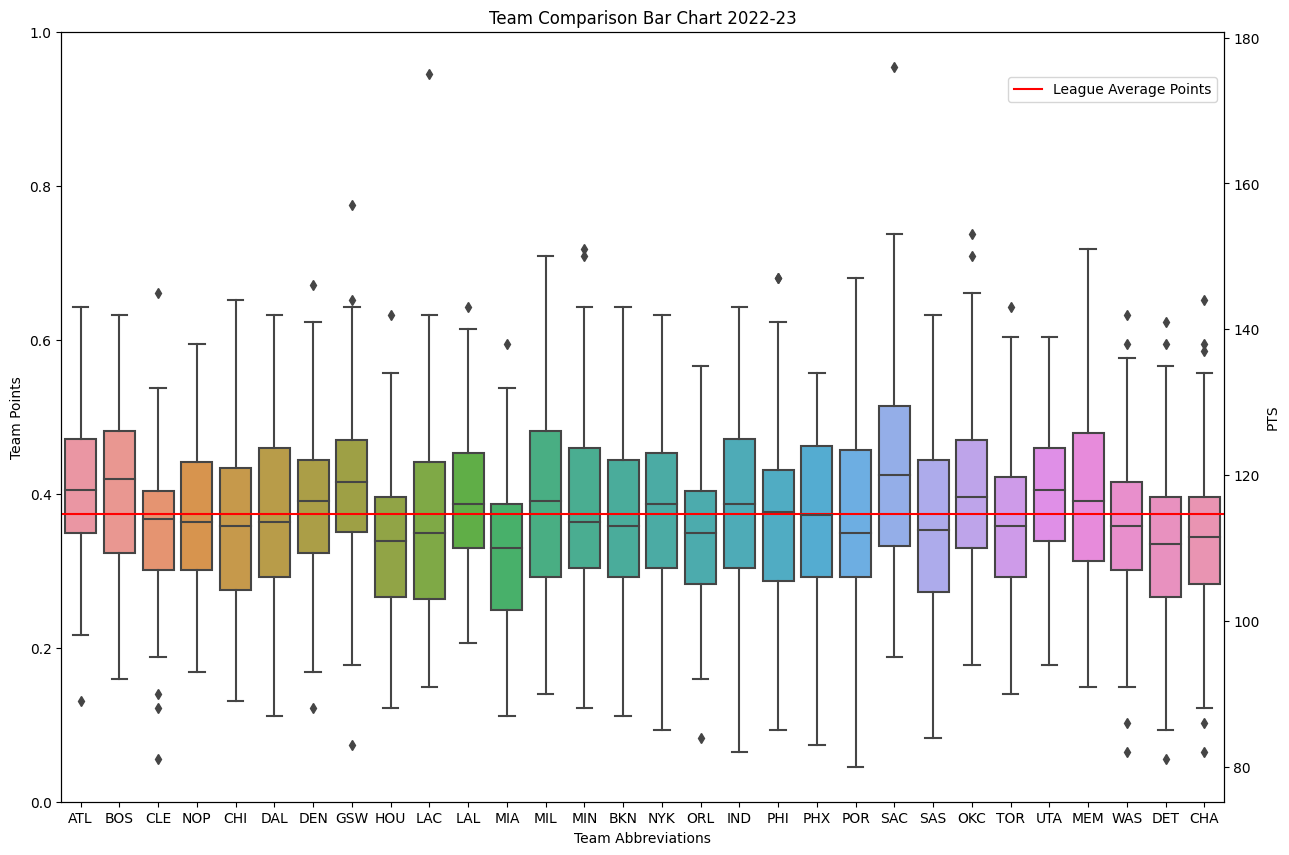

In [5]:
tgl_hdf = pd.read_hdf('tgl_df.h5')

# merging tgl_df dataframe with teams_df
complete_tgl_data = teams_df.merge(tgl_hdf, left_on = 'id', right_on = 'Team_ID')

# Creating a boxplot visualization to show average of points scored by each team for the 2022-23 season.
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

boxplot=sns.boxplot(x='abbreviation', y= 'PTS', data = complete_tgl_data)

# Adding a horizontal line representing League Average Points as a reference for each team's performance.
league_average = complete_tgl_data['PTS'].mean()
ax2.axhline(y=league_average, color='red', linestyle='-', label='League Average Points')


ax.set_title('Team Comparison Bar Chart 2022-23')
ax.set_xlabel('Team Abbreviations')
ax.set_ylabel('Team Points')

ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.95))

plt.show()


As seen in the box plot above, DEN's average points is above the league's average with regards to average points scored in the 2022-23 season. MIA's average points scored in that season is well below the league's average but they were still able to make an appearance in the championship series. However, we can see how DEN is a more offensively dominant team compared to MIA, suggesting that DEN is a high-scoring team while MIA is a low scoring team. There are two assumptions that can be made from the above observation.

> 1. DEN is a high-scoring team and in order to win, they would require outscoring their opponents or showcase defensive dominance. Since the team is focusing on the offensive influence of a team's success, we will be understanding DEN's field goal percentage to confirm if they are affected by their opponents defensive capabilities. If their field goal percentage is above 50%, it would confirm their offensive domination and the fact that their opponents' defensive capabilities do not affect the team's scoring abilities significantly.

> 2. MIA  is a low-scoring team and in order to win games, they would need to showcase defensive prowess in order to contain their opponents score to one that is lower than theirs.

From these assumptions, we can subset game log for DEN and MIA, and focus on their statistics against their opponents. For our next EDA, the team decided to understand what DEN's field goal percentage was with respect to their opponents in the same season.

> **Field Goal Percentage** represents the precentage of field goals made out of the total number of field goals attempted.


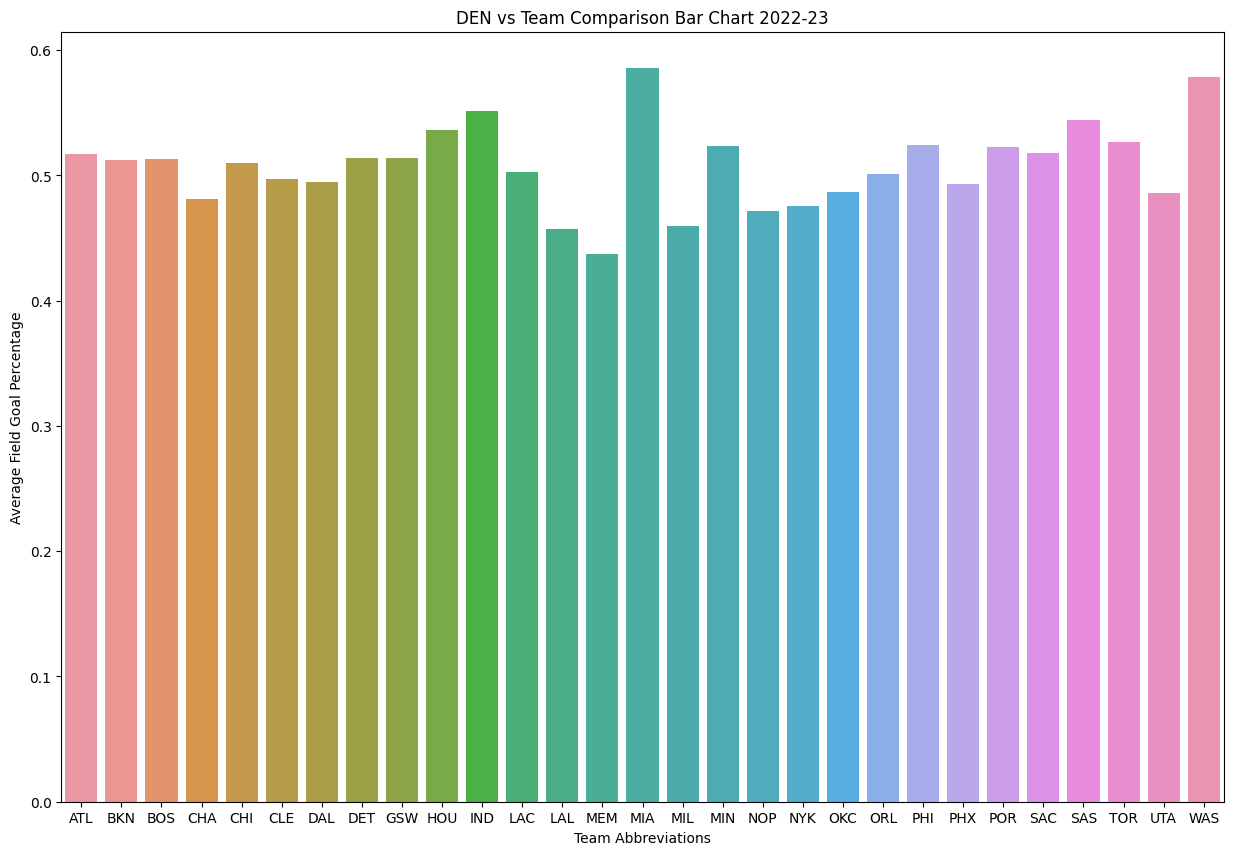

In [6]:
# Splitting the Matchup columns to pull opponent name for each team.
# The indicator column merely suggests if the team is playing at home court or away.
complete_tgl_data[['Team 1', 'Indicator', 'Team 2']] = complete_tgl_data['MATCHUP'].str.split(' ', expand = True)

# Then we are subsetting data for the championship winning team for the 2022-23 season (Denver Nuggets, DEN)
den_tgl_data = complete_tgl_data.set_index('abbreviation').loc['DEN']

fig, bx = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(x = 'Team 2', y = 'FG_PCT',
                      data = den_tgl_data.groupby('Team 2')['FG_PCT'].mean().reset_index())

bx.set_title('DEN vs Team Comparison Bar Chart 2022-23')
bx.set_xlabel('Team Abbreviations')
bx.set_ylabel('Average Field Goal Percentage')
plt.show()


As seen in the graph, Denver Nuggets' field goal percentage is more than 50% against majority of the teams they have played against. This graph emphasizes DEN's offensive dominance further proving that the defense of other teams was simply not enough to reduce DEN's scoring abilities.



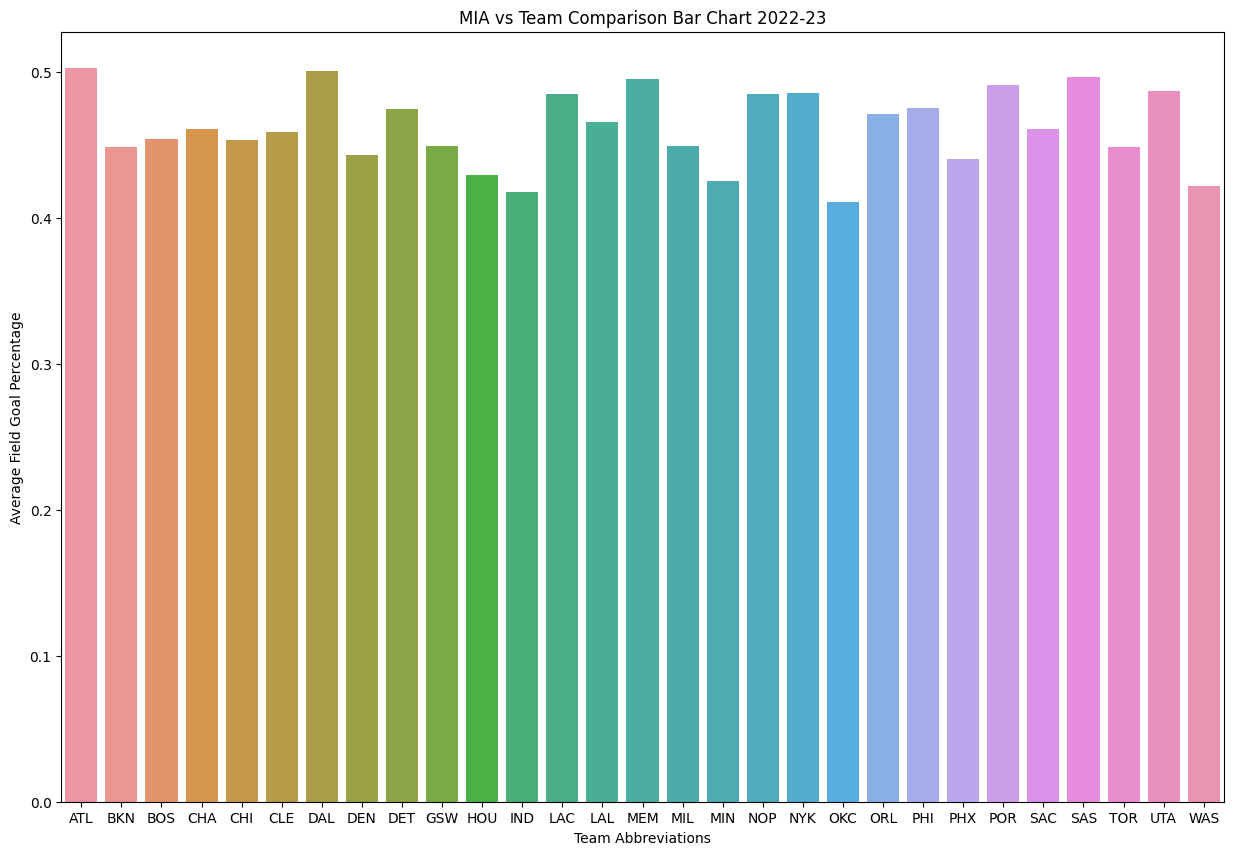

In [7]:
# Then we are subsetting data for the championship winning team for the 2022-23 season (Miami Heat, MIA)
mia_tgl_data = complete_tgl_data.set_index('abbreviation').loc['MIA']

fig, bx = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(x = 'Team 2', y = 'FG_PCT',
                      data = mia_tgl_data.groupby('Team 2')['FG_PCT'].mean().reset_index())

bx.set_title('MIA vs Team Comparison Bar Chart 2022-23')
bx.set_xlabel('Team Abbreviations')
bx.set_ylabel('Average Field Goal Percentage')
plt.show()

As seen in the graph, Miami Heat's field goal percentage is less than 50% against majority of the teams they have played against. With a lower abilitiy to score, MIA requires their opponents to score less in order to win championships. This would mean that MIA would have to rely on defense. This graph confirms our previous assumption that MIA is a defensive team and has relied on defense to win games and qualify for the NBA championship.

This leads us to our next research question:
> Is a team's offensive domination a result of a players efficiency and the impact they create when they are playing on the court?

Below, we are accessing a players Plus/Minus Score to understand if it would be a key feature to a team's success.

In [ ]:
## NBA Finalists by Team vs. Average Plus/Minus Score

from nba_api.stats.endpoints import playergamelog, commonallplayers
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import players

player_info = pd.DataFrame(players.get_active_players())
player_id = player_info['id']

# Getting team_IDs for teams that competed in the finals from 2022-23.
# finals_team_list = teams_df.loc[teams_df['abbreviation'].isin(['MIA','DEN'])]['id'].astype(str)

season = '2022-23'

# Getting nba finalists for 2022-23 season
all_players = commonallplayers.CommonAllPlayers(season=season)
all_players_df = all_players.get_data_frames()[0]

# Filtering players from DEN and MIA
nba_finalists_22023 = all_players_df[all_players_df['TEAM_ABBREVIATION'].isin(['MIA','DEN'])]

# -- Creating a HD5 File for efficient data reading. Could have saved it as CSV but HD5 preserves data structure integrity.

# player_efficiency_df = pd.DataFrame()

# for id in nba_finalists_22023['PERSON_ID']:
#     Call the Player Game log function for each player ID
#     game_log = playergamelog.PlayerGameLog(player_id=id, season = season)
#     df_game_log = game_log.get_data_frames()[0]
#     player_efficiency_df = player_efficiency_df.append(df_game_log, ignore_index=True)

# player_efficiency_df.to_hdf('player_efficiency_df.h5', key='player_efficiency_df', mode='w')

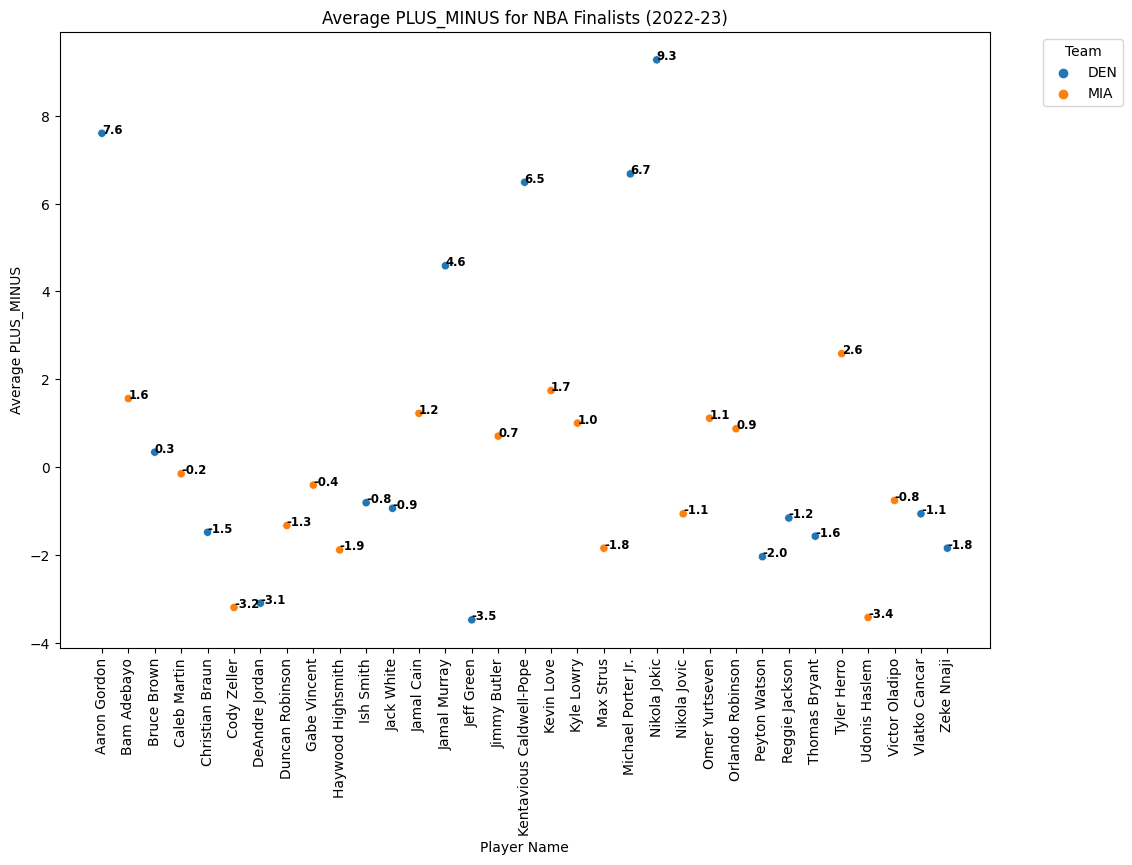

In [ ]:
player_efficiency_hdf = pd.read_hdf('player_efficiency_df.h5')

complete_efficiency_df = nba_finalists_22023.merge(player_efficiency_hdf, left_on = 'PERSON_ID', right_on = 'Player_ID')

# Feature Engineering for Average PLUS_MINUS for each player
avg_plus_minus = complete_efficiency_df.groupby('DISPLAY_FIRST_LAST')['PLUS_MINUS'].mean().reset_index()

# Merging with original data to get 'TEAM_ABBREVIATION'
avg_plus_minus = avg_plus_minus.merge(complete_efficiency_df[['DISPLAY_FIRST_LAST', 'TEAM_ABBREVIATION']].drop_duplicates(), on='DISPLAY_FIRST_LAST')

# Creating a scatter plot to visualize average plus/minus scores for each player.
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='DISPLAY_FIRST_LAST', y='PLUS_MINUS', hue='TEAM_ABBREVIATION', data=avg_plus_minus)

for line in range(0, avg_plus_minus.shape[0]):
     scatter.text(avg_plus_minus['DISPLAY_FIRST_LAST'][line],
                   avg_plus_minus['PLUS_MINUS'][line],
                   round(avg_plus_minus['PLUS_MINUS'].iloc[line], 1),
                   horizontalalignment='left',
                   size='small',
                   color='black',
                   weight='semibold')

plt.title('Average PLUS_MINUS for NBA Finalists (2022-23)')
plt.xlabel('Player Name')
plt.ylabel('Average PLUS_MINUS')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

We can see in the scatter plot above that a handful of DEN players have a significantly higher mean PLUS/ MINUS score (efficiency score), emphasizing that their efficiency was greatly higher than those of MIA players. Logically, this made sense to the team. A team consisiting of higher efficiency scores would tend to be more successful in the span of 82 games.

However, the team did notice a trend with both teams:

> 1. DEN only had 5 players with a positive efficiency scores. Only 5 players were positively impacting the team's performance with 4 out of those 5 players having a mean efficiency score of significantly higher than 0. The team's success for the season, was influenced by 30% of the team. Having said that, it is evident that the 4 players with significantly high mean efficiency scores have great chemistry and perform extremely well when on the same team.

> 2. MIA on the other hand did not have players with high mean efficiency scores, but they had a much higher number of players with a positive mean efficiency score (8 players with positive efficiency). This could explain how MIA was able to win games throughout the season and qualify for the championship series. The team's success was a factor of 50% of the team performing efficiently.

From the above 2 trends, MIA seems like a more all-round team with above-average players who perform well when they play together while DEN seems like it relies on star power to be successful.

...

---


The team then decided to analyze a player's total points scored per season to understand the trend of scoring over the years. The seasons targeted for this analysis was from 2016 to 2023. The two players targeted for this analysis are Stephen Curry and LeBron James as they are high-scoring players. Since the datasets for both these players were not large, the team did not need to write data sets from FOR LOOPS to HD5 Files.

<ipython-input-17-b1b388e6e226>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)
<ipython-input-17-b1b388e6e226>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)
<ipython-input-17-b1b388e6e226>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)
<ipython-input-17-b1b388e6e226>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)
<ipython-input-17-b1b388e6e226>:22: Futu

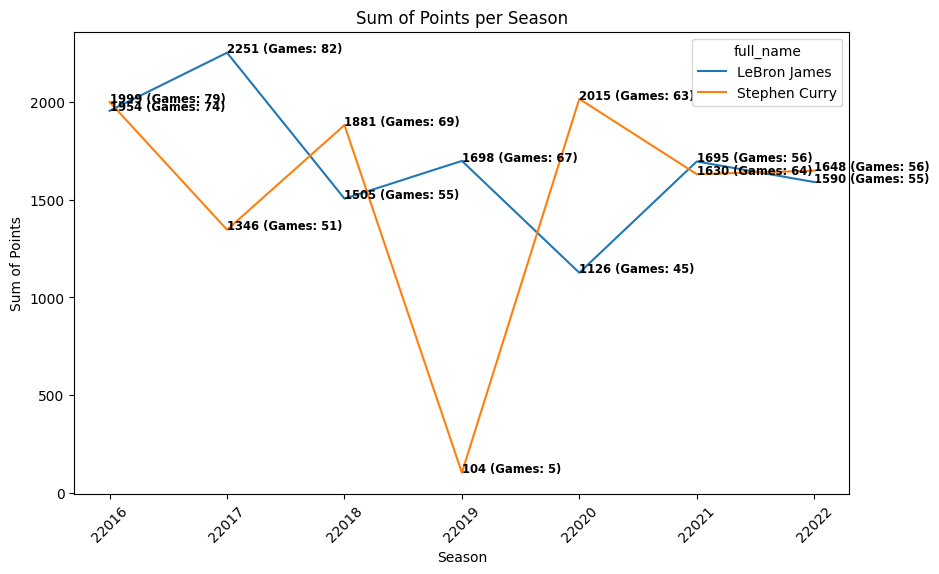

In [ ]:
## Line Plot: Points Trend Over Time

from nba_api.stats.endpoints import playergamelog
import matplotlib.pyplot as plt
import seaborn as sns

# Finding Stephen Curry's Player_ID
sc_player_id = players_df.loc[players_df['full_name']=='Stephen Curry']['id'] #201939

lbj_player_id = ['2544']

# Defining the list of seasons the team is interested in
seasons = ['2016-17','2017-18','2018-19','2019-20','2020-21', '2021-22', '2022-23']

# Initialize an empty DataFrame to store the data
lbj_game_logs = pd.DataFrame()

# Looping through each season, fetching Stephen Curry game log data, and appending to the empty DataFrame
for season in seasons:
      game_log = playergamelog.PlayerGameLog(player_id=lbj_player_id, season=season)
      game_log_df = game_log.get_data_frames()[0]
      lbj_game_logs = lbj_game_logs.append(game_log_df, ignore_index=True)

sc_game_logs = pd.DataFrame()

# Looping through each season, fetching LeBron James game log data, and appending to the empty DataFrame
for season in seasons:
      game_log = playergamelog.PlayerGameLog(player_id=sc_player_id, season=season)
      game_log_df = game_log.get_data_frames()[0]
      sc_game_logs = sc_game_logs.append(game_log_df, ignore_index=True)

# Grouping by season and calculate the sum of points per season
active_players=pd.DataFrame(players.get_active_players())

sc_bio = active_players.loc[active_players['first_name'].isin(['Stephen'])]
sc_game_data = sc_game_logs.merge(sc_bio, left_on = 'Player_ID', right_on = 'id')
sc_games_played = sc_game_data.groupby(['SEASON_ID', 'full_name', 'Player_ID'])['Game_ID'].size().reset_index()

lbj_bio = active_players.loc[active_players['first_name'].isin(['LeBron'])]
lbj_game_data = lbj_game_logs.merge(lbj_bio, left_on = 'Player_ID', right_on = 'id')
lbj_games_played = lbj_game_data.groupby(['SEASON_ID', 'full_name','Player_ID'])['Game_ID'].size().reset_index()

# Feature Engineering number of games played by each player for each season.
games_played = pd.concat([lbj_games_played,sc_games_played], ignore_index=True)
games_played

sc_lbj_game_logs = pd.concat([lbj_game_logs,sc_game_logs], ignore_index=True)
sc_lbj_bio = active_players.loc[active_players['first_name'].isin(['LeBron', 'Stephen'])]
sc_lbj_game_logs = sc_lbj_game_logs.merge(sc_lbj_bio, left_on = 'Player_ID', right_on = 'id')

sum_pts_per_season = sc_lbj_game_logs.groupby(['SEASON_ID', 'Player_ID'])['PTS'].sum().reset_index()
games_played_sorted = games_played.sort_values(by='SEASON_ID', ascending=True)
sum_pts_per_season = sum_pts_per_season.merge(games_played_sorted)

# Creating a line graph for the sum of points per season
fig, ax = plt.subplots(figsize=(10, 6))
lineplot = sns.lineplot(x='SEASON_ID', y='PTS', data=sum_pts_per_season, hue = 'full_name')
for line in range(0, sum_pts_per_season.shape[0]):
     lineplot.text(sum_pts_per_season['SEASON_ID'][line],
                   sum_pts_per_season['PTS'][line],
                   f"{round(sum_pts_per_season['PTS'].iloc[line], 1)} (Games: {sum_pts_per_season['Game_ID'].iloc[line]})",
                   horizontalalignment='left',
                   size='small',
                   color='black',
                   weight='semibold')
ax.set_title('Sum of Points per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Sum of Points')
plt.xticks(rotation=45)
plt.show()


Upon plotting the graph of total points scored for each year for LeBron James and Stephen Curry, the team noticed something interesting with respect to the data. In season 22019, the team saw a significant drop in points for Stephen Curry. Stephen Curry scored a total of 104 points while LeBron James scored a total of 1698 points that season. This seemed like an anomaly at first but when including 'total number of games' played by each player in a given season, the data seemed to evolve logically. In the 22019 season (2019-2020), Stephen Curry only played 5 out of 82 games, averaging 20.8 points that season. Lebron James on the other hand, played 67 out 82 games that season, averaging 25.3 points per game that season. This seemed to be a better performance indicator for each player.

This was an important realization for the team as we realized the importance of predicting 'points per game' for a player, instead of prediciting total points scored by a player for a given season. We understood that feature engineering 'points per game' for each player would remove the bias of players not playing due to injuries, or any other circumstance affecting a players' game time.

The team also noticed an incredible feat of athleticism from LeBron James in the 22017 season where he played in every single game (82 games) in the 2017-2018 season. While this particular data does not affect our objective, it was an impressive piece of statistic with respect to LeBron James' career.

# Machine Learning and building a Prediction Model
## **Getting the list of all the active NBA players**

In [ ]:
# Get Player Career Stats
players_df = pd.DataFrame(players.get_players())
active_plyrs_df = players_df[players_df.is_active == True]
active_plyrs_list = active_plyrs_df.id.to_list()


# career_data = pd.DataFrame()
# for player_id in active_plyrs_list:
    # Call the PlayerCareerStats function for each player ID
#    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id, timeout=1000)
#    df1 = career_stats.get_data_frames()[0]
#    career_data = pd.concat([career_data, df1], ignore_index=True)

In [ ]:
# This function takes a df as an input and converts certain object-type columns to integers.

def convert_object_to_int(df):
    # Iterate through each column in the DataFrame
    for column in df.columns:
        col_name_str = str(column)

        # Check if the column has 'object' dtype, is not 'float64', and does not end with '_id' or '_ID'
        if df[column].dtype == 'object' and df[column].dtype != 'float64' and not col_name_str.endswith(('_id', '_ID')):
            try:
                # Try to convert the column to integer
                df[column] = df[column].astype(int)
            except ValueError:
                # Handle the case where conversion to int is not possible
                print(f"Could not convert {column} to int.")

    # Return the DataFrame with converted columns
    return df

In [ ]:
# career_data.columns

In [ ]:
# career_data.info()

In [ ]:
# career_data = convert_object_to_int(career_data)
# career_data['PLAYER_ID'] = career_data['PLAYER_ID'].astype(object)
# career_data['PLAYER_AGE'] = career_data['PLAYER_AGE'].astype(object)

Could not convert TEAM_ABBREVIATION to int.


In [ ]:
# points per game over the career for each individual player
# career_data['CAREER_PPG'] = career_data['PTS'] / career_data['GP']

In [ ]:
# writing the career data to an h5 file, for quicker data load in the next run
# career_data.to_hdf('career_data.h5', key='career_data', mode='w')
career_data = pd.read_hdf('career_data.h5')

In [ ]:
def aggregate_career_stats(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['float', 'int']).columns

    # Group by 'PLAYER_ID' and calculate the mean for numeric columns
    aggregated_data = df.groupby('PLAYER_ID')[numeric_columns].mean().reset_index()

    return aggregated_data

# Assuming career_data is the DataFrame containing your career stats
aggregated_career_stats = aggregate_career_stats(career_data)

In [ ]:
aggregated_career_stats.columns = ['AVG_' + col for col in aggregated_career_stats.columns]
aggregated_career_stats.rename(columns={'AVG_PLAYER_ID': 'PLAYER_ID'}, inplace=True)

In [ ]:
aggregated_career_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PLAYER_ID       519 non-null    int64  
 1   AVG_GP          519 non-null    float64
 2   AVG_GS          519 non-null    float64
 3   AVG_MIN         519 non-null    float64
 4   AVG_FGM         519 non-null    float64
 5   AVG_FGA         519 non-null    float64
 6   AVG_FG_PCT      519 non-null    float64
 7   AVG_FG3M        519 non-null    float64
 8   AVG_FG3A        519 non-null    float64
 9   AVG_FG3_PCT     519 non-null    float64
 10  AVG_FTM         519 non-null    float64
 11  AVG_FTA         519 non-null    float64
 12  AVG_FT_PCT      519 non-null    float64
 13  AVG_OREB        519 non-null    float64
 14  AVG_DREB        519 non-null    float64
 15  AVG_REB         519 non-null    float64
 16  AVG_AST         519 non-null    float64
 17  AVG_STL         519 non-null    flo

In [ ]:
# merging the aggregated career stats with the original career data
aggregated_career_stats = aggregated_career_stats.merge(career_data[['PLAYER_ID','TEAM_ID']],
                                              how='left', left_on='PLAYER_ID', right_on='PLAYER_ID')

# df shape check before duplicate entries elimination
aggregated_career_stats.shape

# eliminating the duplicated entries if there are any
aggregated_career_stats=aggregated_career_stats[~aggregated_career_stats.duplicated()]

# df shape check after duplicate entries elimination
aggregated_career_stats.shape

(1355, 24)

### **Getting the Player Game log, Team log & player information datasets along with some fetaure engineering exercise**

**Now for our project, we'll actually be predicting the player points for the season 2021-22 hence we'll pulling be the data in two different sets wherein the data from season 2015-16 to 2020-21 will be our training period, on which our model will be trained and 2021-22 will be our testing period, on which we'll evaluate our model performance**

In [ ]:
# Get Player Game Log for training period
# season_list = ['2015-16','2016-17','2017-18','2018-19','2019-20','2020-21']
# game_log_data = pd.DataFrame()
# for s in season_list:
#  for player_id in active_plyrs_list:
  # Call the Player Game log function for each player ID
#    game_log = playergamelog.PlayerGameLog(player_id=player_id, season = s, timeout = 10000)
#    df2 = game_log.get_data_frames()[0]
#    game_log_data = pd.concat([game_log_data, df2], ignore_index=True)

In [ ]:
# writing the game log train data to an h5 file, for quicker data load in the next run
# game_log_data.to_hdf('game_log_data_train_raw.h5', key='game_log_data', mode='w')
game_log_data = pd.read_hdf('game_log_data_train_raw.h5')

In [ ]:
# Get Player Game Log for testing period
# season_list2 = ['2021-22']
# test_game_log_data = pd.DataFrame()
# for s in season_list2:
#  for player_id in active_plyrs_list:
  # Call the Player Game log function for each player ID
#    test_game_log = playergamelog.PlayerGameLog(player_id=player_id, season = s)
#    df2 = test_game_log.get_data_frames()[0]
#    test_game_log_data = pd.concat([test_game_log_data, df2], ignore_index=True)

In [ ]:
# writing the game log test data to an h5 file, for quicker data load in the next run
# test_game_log_data.to_hdf('game_log_data_test_raw.h5', key='test_game_log_data', mode='w')
test_game_log_data = pd.read_hdf('game_log_data_test_raw.h5')

In [ ]:
game_log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70301 entries, 0 to 70300
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEASON_ID        70301 non-null  object 
 1   Player_ID        70301 non-null  object 
 2   Game_ID          70301 non-null  object 
 3   GAME_DATE        70301 non-null  object 
 4   MATCHUP          70301 non-null  object 
 5   WL               70301 non-null  object 
 6   MIN              70301 non-null  object 
 7   FGM              70301 non-null  object 
 8   FGA              70301 non-null  object 
 9   FG_PCT           70301 non-null  float64
 10  FG3M             70301 non-null  object 
 11  FG3A             70301 non-null  object 
 12  FG3_PCT          70301 non-null  float64
 13  FTM              70301 non-null  object 
 14  FTA              70301 non-null  object 
 15  FT_PCT           70301 non-null  float64
 16  OREB             70301 non-null  object 
 17  DREB        

In [ ]:
# subsetting the game log train data by considering on the scoring & id features
selected_features = game_log_data[['SEASON_ID','Player_ID','Game_ID','MIN', 'FGM', 'FGA', 'FG3M', 'FTM', 'FTA', 'OREB',
                                   'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PLUS_MINUS','PTS']]

In [ ]:
# subsetting the game log test data by considering on the scoring & id features
test_selected_features = test_game_log_data[['SEASON_ID','Player_ID','Game_ID','MIN', 'FGM', 'FGA', 'FG3M', 'FTM', 'FTA', 'OREB',
                                   'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PLUS_MINUS','PTS']]

In [ ]:
# Player's average points per game, field goal percentage, three-point percentage, etc.
selected_features['AVG_PTS'] = game_log_data['PTS'].expanding().mean()
selected_features['FG_PCT'] = game_log_data['FG_PCT']
selected_features['FG3_PCT'] = game_log_data['FG3_PCT']

<ipython-input-46-e230f50fcb76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['AVG_PTS'] = game_log_data['PTS'].expanding().mean()
<ipython-input-46-e230f50fcb76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['FG_PCT'] = game_log_data['FG_PCT']
<ipython-input-46-e230f50fcb76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
test_selected_features['AVG_PTS'] = test_game_log_data['PTS'].expanding().mean()
test_selected_features['FG_PCT'] = test_game_log_data['FG_PCT']
test_selected_features['FG3_PCT'] = test_game_log_data['FG3_PCT']

<ipython-input-47-e2c30e13d048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['AVG_PTS'] = test_game_log_data['PTS'].expanding().mean()
<ipython-input-47-e2c30e13d048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['FG_PCT'] = test_game_log_data['FG_PCT']
<ipython-input-47-e2c30e13d048>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
# merging the aggregated career stats data with our subsetted game log data
selected_features_2 = selected_features.merge(aggregated_career_stats, how='left', left_on='Player_ID', right_on='PLAYER_ID')

In [ ]:
# selected_features_2.to_hdf('selected_features_2_interimtab1.h5', key='selected_features_2', mode='w')

In [ ]:
test_selected_features_2 = test_selected_features.merge(aggregated_career_stats, how='left', left_on='Player_ID', right_on='PLAYER_ID')

In [ ]:
# test_selected_features_2.to_hdf('selected_features_2_test_interimtab1.h5', key='test_selected_features_2', mode='w')

In [ ]:
selected_features_2.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM',
       'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'PTS', 'AVG_PTS_x', 'FG_PCT', 'FG3_PCT', 'PLAYER_ID', 'AVG_GP',
       'AVG_GS', 'AVG_MIN', 'AVG_FGM', 'AVG_FGA', 'AVG_FG_PCT', 'AVG_FG3M',
       'AVG_FG3A', 'AVG_FG3_PCT', 'AVG_FTM', 'AVG_FTA', 'AVG_FT_PCT',
       'AVG_OREB', 'AVG_DREB', 'AVG_REB', 'AVG_AST', 'AVG_STL', 'AVG_BLK',
       'AVG_TOV', 'AVG_PF', 'AVG_PTS_y', 'AVG_CAREER_PPG', 'TEAM_ID'],
      dtype='object')

In [ ]:
selected_features_2.rename(columns={'AVG_PTS_x': 'AVG_PTS','AVG_PTS_y':'OVR_CR_AVG_PTS'}, inplace=True)
selected_features_2.drop('PLAYER_ID', axis=1, inplace=True)

In [ ]:
test_selected_features_2.rename(columns={'AVG_PTS_x': 'AVG_PTS','AVG_PTS_y':'OVR_CR_AVG_PTS'}, inplace=True)
test_selected_features_2.drop('PLAYER_ID', axis=1, inplace=True)

In [ ]:
selected_features_2.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM',
       'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'PTS', 'AVG_PTS', 'FG_PCT', 'FG3_PCT', 'AVG_GP', 'AVG_GS', 'AVG_MIN',
       'AVG_FGM', 'AVG_FGA', 'AVG_FG_PCT', 'AVG_FG3M', 'AVG_FG3A',
       'AVG_FG3_PCT', 'AVG_FTM', 'AVG_FTA', 'AVG_FT_PCT', 'AVG_OREB',
       'AVG_DREB', 'AVG_REB', 'AVG_AST', 'AVG_STL', 'AVG_BLK', 'AVG_TOV',
       'AVG_PF', 'OVR_CR_AVG_PTS', 'AVG_CAREER_PPG', 'TEAM_ID'],
      dtype='object')

In [ ]:
selected_features_2.shape

(291683, 44)

In [ ]:
test_selected_features_2.shape

(65314, 44)

In [ ]:
# getting the team log data for the training period
team = teams.get_teams()
teams_df = pd.DataFrame(team)
teams_df_cop = teams_df.copy()
teams_df_cop.id = teams_df_cop.id.astype(str)
team_list = teams_df_cop.id.to_list()
season_list = ['2015-16','2016-17','2017-18','2018-19','2019-20','2020-21']

# Initialize an empty list to store DataFrames
# all_team_game_logs_list = []

# Loop through each team ID and retrieve the team game log
# for s in season_list:
#    for team_id in team_list:
#        team_game_log = teamgamelog.TeamGameLog(team_id=team_id, season=s)
#        team_game_log_data = team_game_log.get_data_frames()[0]

        # Append the team game log to the list
#        all_team_game_logs_list.append(team_game_log_data)

# Concatenate the list of DataFrames into a single DataFrame
# all_team_game_logs = pd.concat(all_team_game_logs_list, ignore_index=True)

# Display the combined team game log data
# all_team_game_logs.head()
# all_team_game_logs['GAME_DATE'] = pd.to_datetime(all_team_game_logs['GAME_DATE'])

In [ ]:
# all_team_game_logs.to_hdf('all_team_game_logs_train.h5', key='all_team_game_logs', mode='w')
all_team_game_logs = pd.read_hdf('all_team_game_logs_train.h5')

In [ ]:
# getting the team log data for the testing period
test_season_list = ['2021-22']

# Initialize an empty list to store DataFrames
# test_all_team_game_logs_list = []

# Loop through each team ID and retrieve the team game log
# for s in test_season_list:
#    for team_id in team_list:
#        test_team_game_log = teamgamelog.TeamGameLog(team_id=team_id, season=s)
#       test_team_game_log_data = test_team_game_log.get_data_frames()[0]

        # Append the team game log to the list
#        test_all_team_game_logs_list.append(test_team_game_log_data)

# Concatenate the list of DataFrames into a single DataFrame
# test_all_team_game_logs = pd.concat(test_all_team_game_logs_list, ignore_index=True)

# Display the combined team game log data
# test_all_team_game_logs.head()
# test_all_team_game_logs['GAME_DATE'] = pd.to_datetime(test_all_team_game_logs['GAME_DATE'])

In [ ]:
# test_all_team_game_logs.to_hdf('test_all_team_game_logs.h5', key='test_all_team_game_logs', mode='w')
test_all_team_game_logs = pd.read_hdf('test_all_team_game_logs.h5')

In [ ]:
all_team_game_logs.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'W', 'L', 'W_PCT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [ ]:
# extracting the team win percentage basis the wins in the previous seasons
team_win_percentage = all_team_game_logs.groupby('Team_ID')['WL'].apply(lambda x: (x == 'W').mean()).reset_index()
team_win_percentage.rename(columns={'WL': 'Winning_Percentage'}, inplace=True)

In [ ]:
test_team_win_percentage = test_all_team_game_logs.groupby('Team_ID')['WL'].apply(lambda x: (x == 'W').mean()).reset_index()
test_team_win_percentage.rename(columns={'WL': 'Winning_Percentage'}, inplace=True)

In [ ]:
selected_features_3 = selected_features_2.merge(team_win_percentage[['Team_ID','Winning_Percentage']],
                                              how='left', left_on='TEAM_ID', right_on='Team_ID')

In [ ]:
# selected_features_3.to_hdf('selected_features_3_interimtab2.h5', key='selected_features_3', mode='w')

In [ ]:
test_selected_features_3 = test_selected_features_2.merge(test_team_win_percentage[['Team_ID','Winning_Percentage']],
                                              how='left', left_on='TEAM_ID', right_on='Team_ID')

In [ ]:
# test_selected_features_3.to_hdf('selected_features_3_test_interimtab2.h5', key='test_selected_features_3', mode='w')

In [ ]:
selected_features_3[selected_features_3.duplicated()]

,SEASON_ID,Player_ID,Game_ID,MIN,FGM,FGA,FG3M,FTM,FTA,OREB,...,AVG_AST,AVG_STL,AVG_BLK,AVG_TOV,AVG_PF,OVR_CR_AVG_PTS,AVG_CAREER_PPG,TEAM_ID,Team_ID,Winning_Percentage


In [ ]:
print(selected_features_2.shape)
print(team_win_percentage.shape)
print(selected_features_3.shape)

(291683, 44)
(30, 2)
(291683, 46)


In [ ]:
print(test_selected_features_2.shape)
print(test_team_win_percentage.shape)
print(test_selected_features_3.shape)

(65314, 44)
(30, 2)
(65314, 46)


In [ ]:
selected_features_3.rename(columns={'Winning_Percentage': 'Team_Winning_Percentage'}, inplace=True)

In [ ]:
test_selected_features_3.rename(columns={'Winning_Percentage': 'Team_Winning_Percentage'}, inplace=True)

In [ ]:
# Getting the Player Personal Info (Height, Weight)
# player_info_data = pd.DataFrame()
# for player_id in active_plyrs_list:
    # Call the PlayerCareerStats function for each player ID
#    player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id, timeout = 1000)
#    df1 = player_info.get_data_frames()[0]
#    player_info_data = pd.concat([player_info_data, df1], ignore_index=True)

In [ ]:
# player_info_data.to_hdf('player_info_data_raw.h5', key='player_info_data', mode='w')
player_info_data = pd.read_hdf('player_info_data_raw.h5')

In [ ]:
selected_features_3.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM',
       'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'PTS', 'AVG_PTS', 'FG_PCT', 'FG3_PCT', 'AVG_GP', 'AVG_GS', 'AVG_MIN',
       'AVG_FGM', 'AVG_FGA', 'AVG_FG_PCT', 'AVG_FG3M', 'AVG_FG3A',
       'AVG_FG3_PCT', 'AVG_FTM', 'AVG_FTA', 'AVG_FT_PCT', 'AVG_OREB',
       'AVG_DREB', 'AVG_REB', 'AVG_AST', 'AVG_STL', 'AVG_BLK', 'AVG_TOV',
       'AVG_PF', 'OVR_CR_AVG_PTS', 'AVG_CAREER_PPG', 'TEAM_ID', 'Team_ID',
       'Team_Winning_Percentage'],
      dtype='object')

In [ ]:
selected_features_4 = selected_features_3.merge(player_info_data[['PERSON_ID','HEIGHT','WEIGHT']],
                                              how='left', left_on='Player_ID', right_on='PERSON_ID')

selected_features_4.drop('PERSON_ID', axis=1, inplace=True)
selected_features_4.rename(columns={'HEIGHT': 'Player_HEIGHT', 'WEIGHT': 'Player_WEIGHT'}, inplace=True)
selected_features_3.drop('Team_ID', axis=1, inplace=True)
selected_features_4.drop('Team_ID', axis=1, inplace=True)

In [ ]:
# selected_features_4.to_hdf('selected_features_4_interimtab3.h5', key='selected_features_4', mode='w')

In [ ]:
test_selected_features_4 = test_selected_features_3.merge(player_info_data[['PERSON_ID','HEIGHT','WEIGHT']],
                                              how='left', left_on='Player_ID', right_on='PERSON_ID')

test_selected_features_4.drop('PERSON_ID', axis=1, inplace=True)
test_selected_features_4.rename(columns={'HEIGHT': 'Player_HEIGHT', 'WEIGHT': 'Player_WEIGHT'}, inplace=True)
test_selected_features_3.drop('Team_ID', axis=1, inplace=True)
test_selected_features_4.drop('Team_ID', axis=1, inplace=True)

In [ ]:
# test_selected_features_4.to_hdf('selected_features_4_test_interimtab3.h5', key='test_selected_features_4', mode='w')

In [ ]:
print(selected_features_3.shape)
print(player_info_data.shape)
print(selected_features_4.shape)

(291683, 45)
(531, 33)
(291683, 47)


In [ ]:
print(test_selected_features_3.shape)
print(player_info_data.shape)
print(test_selected_features_4.shape)

(65314, 45)
(531, 33)
(65314, 47)


In [ ]:
selected_features_4.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM',
       'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'PTS', 'AVG_PTS', 'FG_PCT', 'FG3_PCT', 'AVG_GP', 'AVG_GS', 'AVG_MIN',
       'AVG_FGM', 'AVG_FGA', 'AVG_FG_PCT', 'AVG_FG3M', 'AVG_FG3A',
       'AVG_FG3_PCT', 'AVG_FTM', 'AVG_FTA', 'AVG_FT_PCT', 'AVG_OREB',
       'AVG_DREB', 'AVG_REB', 'AVG_AST', 'AVG_STL', 'AVG_BLK', 'AVG_TOV',
       'AVG_PF', 'OVR_CR_AVG_PTS', 'AVG_CAREER_PPG', 'TEAM_ID',
       'Team_Winning_Percentage', 'Player_HEIGHT', 'Player_WEIGHT'],
      dtype='object')

In [ ]:
selected_features_4.isnull().sum()

SEASON_ID                      0
Player_ID                      0
Game_ID                        0
MIN                            0
FGM                            0
FGA                            0
FG3M                           0
FTM                            0
FTA                            0
OREB                           0
DREB                           0
AST                            0
STL                            0
BLK                            0
TOV                            0
PF                             0
PLUS_MINUS                     0
PTS                            0
AVG_PTS                        0
FG_PCT                         0
FG3_PCT                        0
AVG_GP                         0
AVG_GS                         0
AVG_MIN                        0
AVG_FGM                        0
AVG_FGA                        0
AVG_FG_PCT                     0
AVG_FG3M                       0
AVG_FG3A                       0
AVG_FG3_PCT                    0
AVG_FTM   

In [ ]:
null_percentage = selected_features_4.isnull().mean() * 100
print("Null Values Percentage:")
print(null_percentage)

Null Values Percentage:
SEASON_ID                   0.000000
Player_ID                   0.000000
Game_ID                     0.000000
MIN                         0.000000
FGM                         0.000000
FGA                         0.000000
FG3M                        0.000000
FTM                         0.000000
FTA                         0.000000
OREB                        0.000000
DREB                        0.000000
AST                         0.000000
STL                         0.000000
BLK                         0.000000
TOV                         0.000000
PF                          0.000000
PLUS_MINUS                  0.000000
PTS                         0.000000
AVG_PTS                     0.000000
FG_PCT                      0.000000
FG3_PCT                     0.000000
AVG_GP                      0.000000
AVG_GS                      0.000000
AVG_MIN                     0.000000
AVG_FGM                     0.000000
AVG_FGA                     0.000000
AVG_FG_PCT    

### **Standardizing our training and test data**

In [ ]:
######################## data standardization using StandardScaler ###################################
################### training dataset ########################
# creating our target variable as we can't perform standardization on our target variable
selected_features_4['PTS'] = selected_features_4['PTS'].astype(float)
selected_features_4 = convert_object_to_int(selected_features_4)
selected_features_4.Player_HEIGHT = selected_features_4.Player_HEIGHT.str.replace('-','.')
selected_features_4.Player_HEIGHT = selected_features_4.Player_HEIGHT.astype(float)


# Dropping the target variable from the independent variables df
selected_features_5 = selected_features_4[selected_features_4.TEAM_ID != 0]
target_variable = selected_features_5['PTS']
target_variable = target_variable[selected_features_5.index]
print(target_variable.shape)
selected_features_5.drop('PTS', axis=1, inplace=True)
selected_features_6 = selected_features_5.drop(['SEASON_ID','Player_ID','Game_ID'], axis=1)
selected_features_6 = selected_features_6.drop(['TEAM_ID'], axis=1)

# applying Standard scaler on independent variables dataframe
scaler = StandardScaler()
X_scaled_selected_data_6 = scaler.fit_transform(selected_features_6)
selected_data_6_scaled = selected_features_6.copy()
selected_data_6_scaled[selected_features_6.columns] = X_scaled_selected_data_6

Could not convert Player_HEIGHT to int.
(255151,)


<ipython-input-83-346384933d60>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_5.drop('PTS', axis=1, inplace=True)


<ipython-input-84-27cae3859dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = table_for_corr.corr()


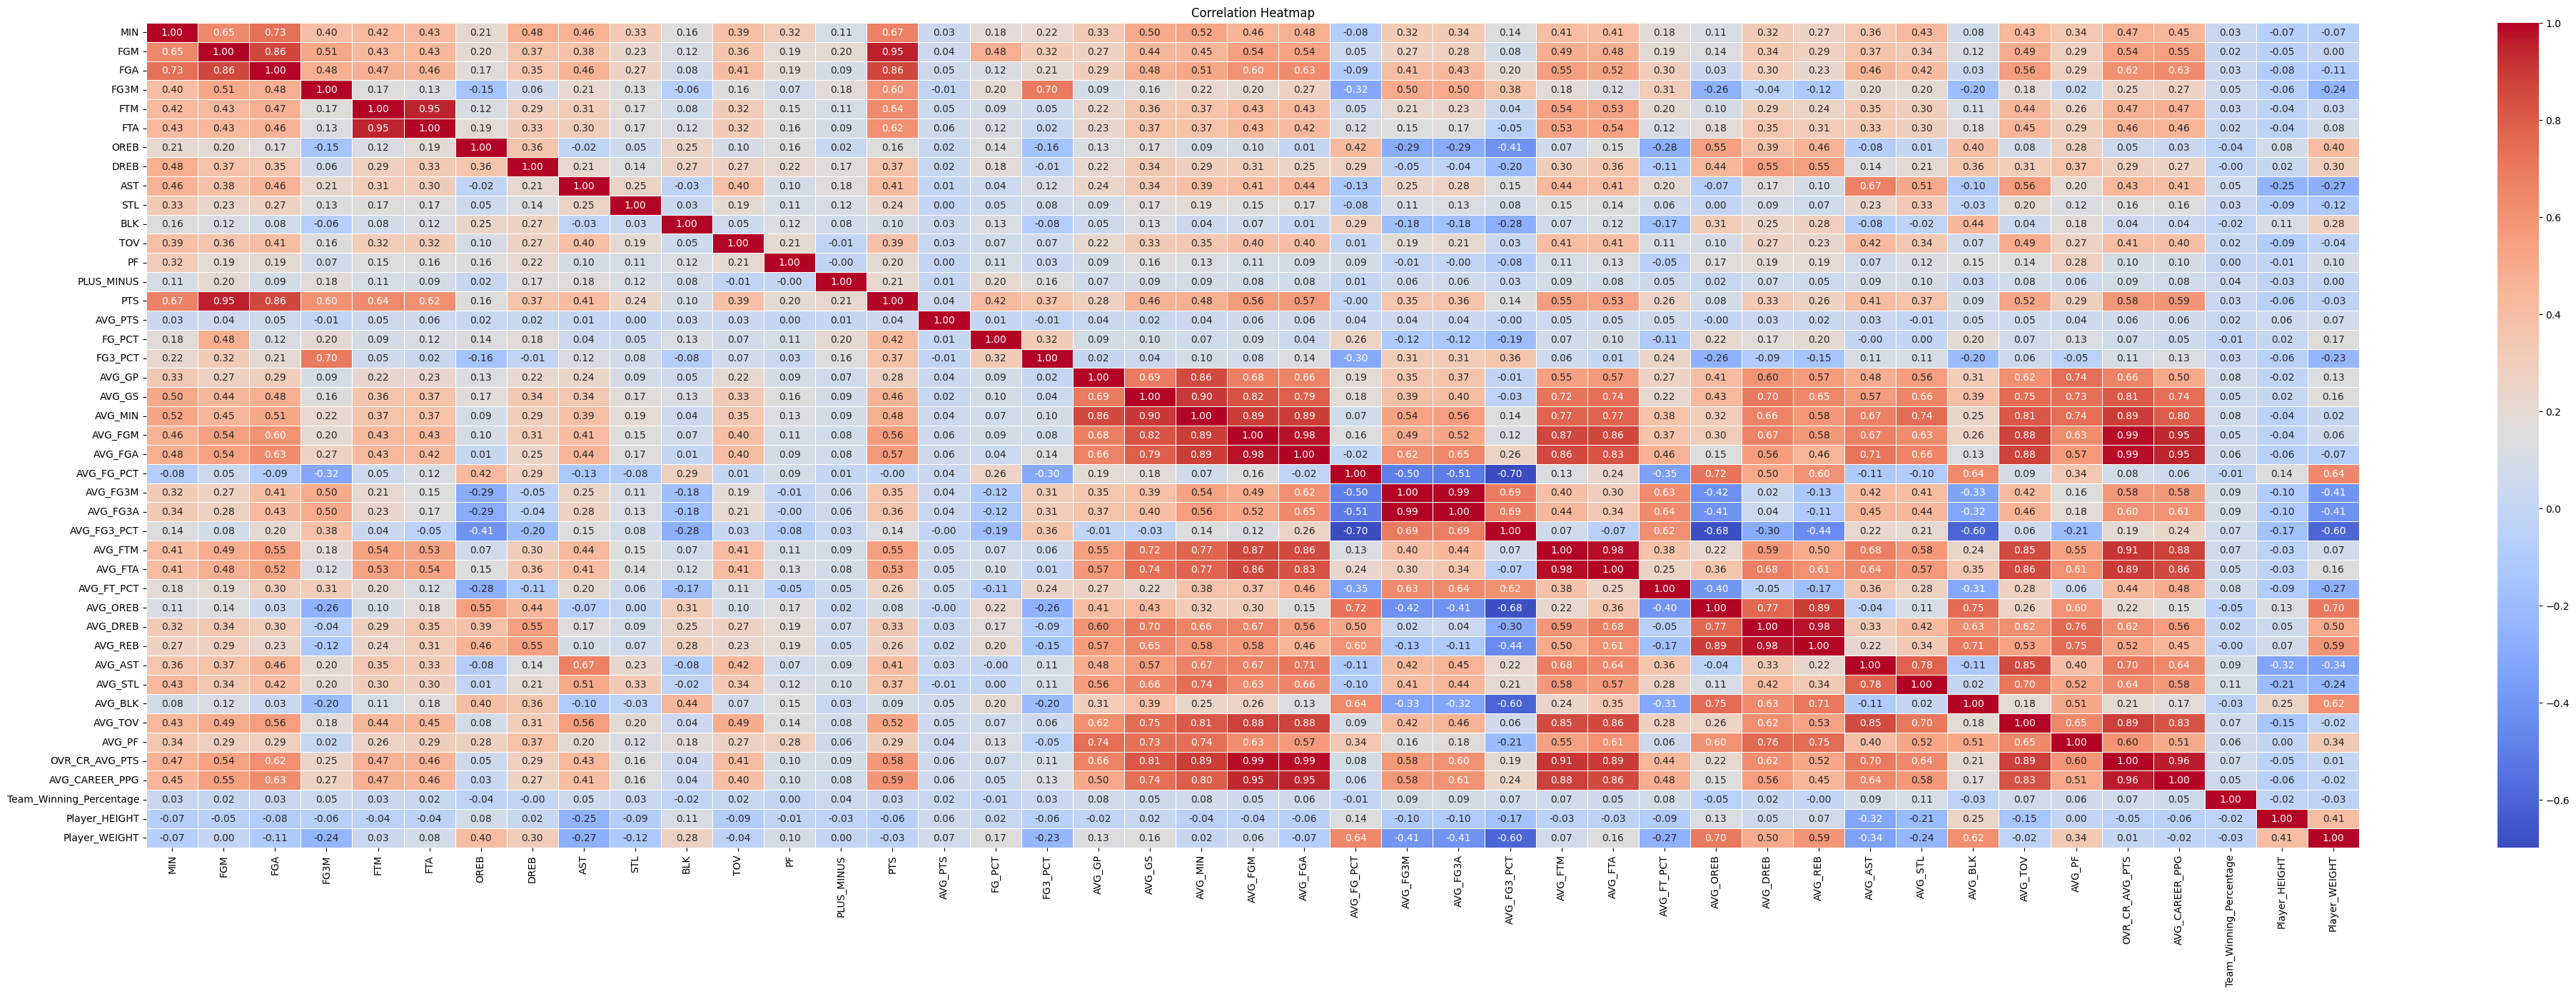

In [ ]:
table_for_corr = selected_features_4[selected_features_4.TEAM_ID != 0]
correlation_matrix = table_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(50, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# as we can see from the below heatmap, majority of our independent features are decently correlated to our target variable,
# thereby indicating that are having atleast some kind of impact on our target variables "PTS"

In [ ]:
print(selected_features_6.shape)
print(target_variable.shape)

(255151, 42)
(255151,)


In [ ]:
################### test dataset ########################
test_selected_features_4['PTS'] = test_selected_features_4['PTS'].astype(float)
test_selected_features_4 = convert_object_to_int(test_selected_features_4)
test_selected_features_4.Player_HEIGHT = test_selected_features_4.Player_HEIGHT.str.replace('-','.')
test_selected_features_4.Player_HEIGHT = test_selected_features_4.Player_HEIGHT.astype(float)


# Dropping the target variable from the independent variables df
test_selected_features_5 = test_selected_features_4[test_selected_features_4.TEAM_ID != 0]
test_target_variable = test_selected_features_5['PTS']
test_target_variable = test_target_variable[test_selected_features_5.index]
print(test_target_variable.shape)
test_selected_features_5.drop('PTS', axis=1, inplace=True)
test_selected_features_6 = test_selected_features_5.drop(['SEASON_ID','Player_ID','Game_ID'], axis=1)
test_selected_features_6 = test_selected_features_6.drop(['TEAM_ID'], axis=1)

# applying Standard scaler on independent variables dataframe
scaler = StandardScaler()
X_test_scaled_selected_data_6 = scaler.fit_transform(test_selected_features_6)
test_selected_data_6_scaled = test_selected_features_6.copy()
test_selected_data_6_scaled[test_selected_data_6_scaled.columns] = X_test_scaled_selected_data_6

Could not convert Player_HEIGHT to int.
(57196,)


<ipython-input-86-515a5abd975d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features_5.drop('PTS', axis=1, inplace=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(test_selected_features_6.shape)
print(test_target_variable.shape)

(57196, 42)
(57196,)


### **Training our Linear Regression Model on the standardized train dataset and testing our model performance on the test dataset**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Splitting the data into train and test basis the time frame
X_train = selected_data_6_scaled
X_test = test_selected_data_6_scaled
y_train = target_variable
y_test = test_target_variable

In [ ]:
y_train.shape

(255151,)

In [ ]:
# building and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make Predictions
predictions = model.predict(X_test)

In [ ]:
test_selected_features_5.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM',
       'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'AVG_PTS', 'FG_PCT', 'FG3_PCT', 'AVG_GP', 'AVG_GS', 'AVG_MIN',
       'AVG_FGM', 'AVG_FGA', 'AVG_FG_PCT', 'AVG_FG3M', 'AVG_FG3A',
       'AVG_FG3_PCT', 'AVG_FTM', 'AVG_FTA', 'AVG_FT_PCT', 'AVG_OREB',
       'AVG_DREB', 'AVG_REB', 'AVG_AST', 'AVG_STL', 'AVG_BLK', 'AVG_TOV',
       'AVG_PF', 'OVR_CR_AVG_PTS', 'AVG_CAREER_PPG', 'TEAM_ID',
       'Team_Winning_Percentage', 'Player_HEIGHT', 'Player_WEIGHT'],
      dtype='object')

In [ ]:
qc = pd.DataFrame({'player_id':test_selected_features_5['Player_ID'],
                   'game_id':test_selected_features_5['Game_ID'],
                   'Actuals':y_test,'Predicted':predictions})

In [ ]:
qc2 = test_selected_features_5.copy()
qc2['Actuals'] = y_test
qc2['Predicted'] = predictions

In [ ]:
qc2['Predicted'] = np.ceil(qc2['Predicted']).astype(int)
qc2

,SEASON_ID,Player_ID,Game_ID,MIN,FGM,FGA,FG3M,FTM,FTA,OREB,...,AVG_TOV,AVG_PF,OVR_CR_AVG_PTS,AVG_CAREER_PPG,TEAM_ID,Team_Winning_Percentage,Player_HEIGHT,Player_WEIGHT,Actuals,Predicted
0,22021,1630173,0022101226,26,4,13,1,0,0,2,...,53.0,94.25,405.0,7.828965,1610612748,0.646341,6.8,243,9.0,10
1,22021,1630173,0022101226,26,4,13,1,0,0,2,...,53.0,94.25,405.0,7.828965,1610612761,0.585366,6.8,243,9.0,10
2,22021,1630173,0022101206,12,2,5,1,3,3,0,...,53.0,94.25,405.0,7.828965,1610612748,0.646341,6.8,243,8.0,10
3,22021,1630173,0022101206,12,2,5,1,3,3,0,...,53.0,94.25,405.0,7.828965,1610612761,0.585366,6.8,243,8.0,10
4,22021,1630173,0022101197,40,7,11,5,1,2,1,...,53.0,94.25,405.0,7.828965,1610612748,0.646341,6.8,243,20.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65306,22021,1627826,0022100049,25,5,6,0,0,0,0,...,59.9,123.30,463.0,8.833027,1610612746,0.512195,7.0,240,10.0,11
65308,22021,1627826,0022100034,19,3,7,0,0,0,4,...,59.9,123.30,463.0,8.833027,1610612747,0.402439,7.0,240,6.0,7
65309,22021,1627826,0022100034,19,3,7,0,0,0,4,...,59.9,123.30,463.0,8.833027,1610612746,0.512195,7.0,240,6.0,7
65311,22021,1627826,0022100016,17,4,7,0,6,10,1,...,59.9,123.30,463.0,8.833027,1610612747,0.402439,7.0,240,14.0,16


In [ ]:
result_df = qc.groupby(['player_id', 'game_id']).agg({'Actuals': 'mean', 'Predicted': 'mean'}).reset_index()

In [ ]:
# Evaluating Model Performance using MSE, R-squared score & MAE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)


print(f'Mean Squared Error: {mse}')
print("R^2 Score (Test Set):", r2_test)
print(f'Mean Absolute Error: {mae}')

# here we can observe that we are getting a very good accuracy score of 98.2% and MSE of 1.179 which indicates that our prediction of player points
# vary only by +/- 1.179 points from the actual points thereby proving the good credibility of our model.

Mean Squared Error: 1.1790064533440077
R^2 Score (Test Set): 0.9824344326450181
Mean Absolute Error: 1.0417152153474314


## **Conclusion**

Now to finally conclude, in this project we answered -

1. How the performance of teams can vary against other teams.

2. Within the teams, we also observed efficiency performance variations amongst individual players of the team. Here, we understood that MIA had 50% - 60% of their roster positively impact a team's performance while DEN only had 30% or so positively affect the team's performance.

3. We also saw performance comparison amongst two of the Greatest of All Times in the NBA,  Lebron James and Steph Curry and understood that points per game is a more credible performance indicator than total points scored in a whole season.

4. Finally, we understood all the significant features which can affect the player's point scoring ability and predicted points of the players per game for the season 2021-22 using a simple Linear Regression Model. Hence, using this trained model we would also be able to predict the points a player will score per game for the upcoming seasons.

Our prediction model can then be used by General Managers of each team to strategically trade for players that showcase more offensive dominance. Coaches can also use our prediction model to reallocate minutes played for each player and build a more offensive rotation in order to win championships.

---

# Appendix

## Research links used:

> 1. https://github.com/swar/nba_api

> 2. https://youtu.be/YzZGKhBdBWA?si=glAJbX_hR0WgoZ-v

> 3. https://youtu.be/nHtlRlWmTV4?si=rYp6jKFaC1E7Yg6h

> 4. https://pypi.org/project/nba_api/

> 5. https://medium.com/@ben.g.ballard/how-to-analyze-nba-data-using-python-and-the-nba-api-429b0e65454d

## Link to Data Dictionary:

> https://sumailsyr-my.sharepoint.com/:x:/g/personal/kmtare_syr_edu/EbihI1AovL9OogVo-0PybaQBEgu8yx8wvTgfcp9FWqjhvA?e=WgSTi3

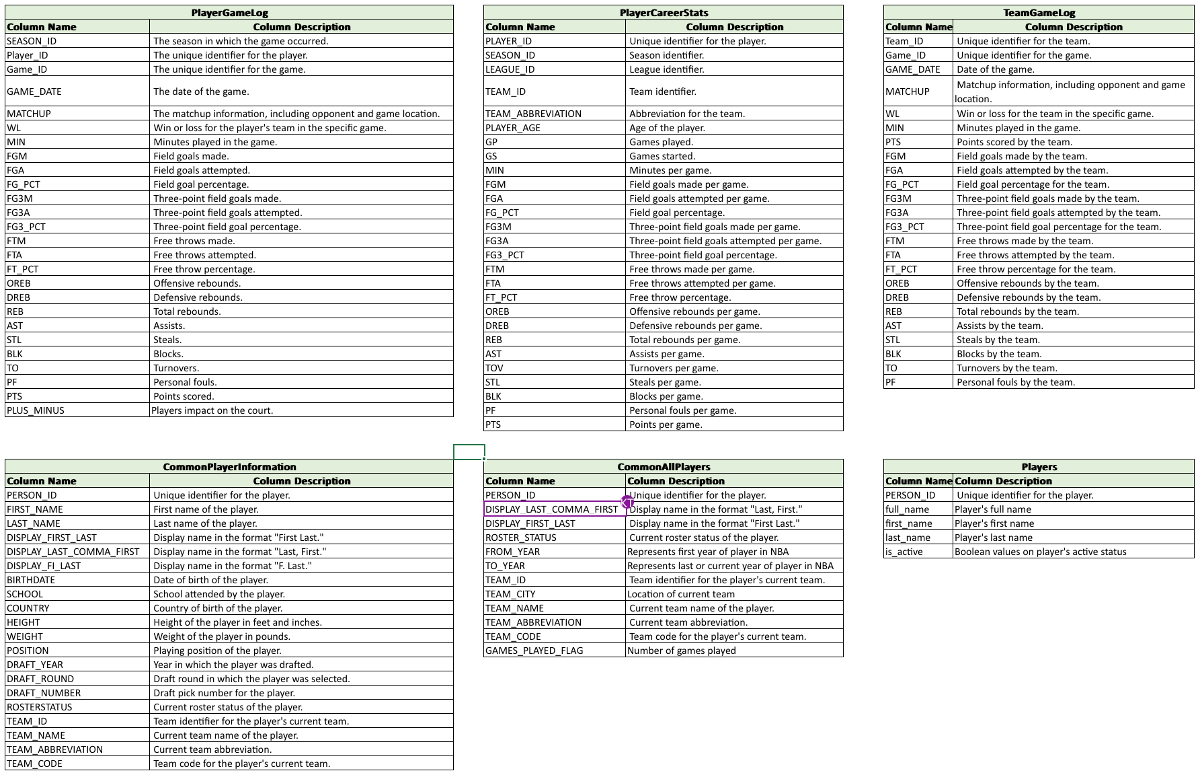

## Link to group presentation:

> https://sumailsyr-my.sharepoint.com/:p:/g/personal/kmtare_syr_edu/ESAOcitQRmFDjKoMXm1Peh8BiAqWAjmrfo4X7HSSdoKE0Q?e=32jJEW